In [1]:
import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas as pd

# for interactive graphs 
import chart_studio.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
nserc_grants = mk.GrantCollection('raw_data/grants/nserc/')
print('There are', len(nserc_grants), 'Grants in this Grant Collection.')

There are 71184 Grants in this Grant Collection.


# Co-Investigator Networks

以官方提供的grant数据为例：https://github.com/mclevey/metaknowledge_article_supplement

In [3]:
ci_nets = nserc_grants.networkCoInvestigator()
print(mk.graphStats(ci_nets))

#此处如果AttributeError: 'Graph' object has no attribute 'node'，可以将nx的版本降低到2.3
#或者根据提示把对应文件中node属性改成nodes即可
#此处属于networkx版本迭代导致

Nodes: 33655
Edges: 130586
Isolates: 26284
Self loops: 4
Density: 0.00023059
Transitivity: 0.902158


## 简化数据集，基于最大子群绘制可视化网络图

    连线和节点太多，按照连线的最小权重为4进行数据集简化

In [4]:
print(sorted([len(c) for c in nx.connected_components(ci_nets)],reverse=True))

[6259, 20, 18, 16, 16, 13, 13, 12, 12, 12, 11, 11, 11, 10, 10, 10, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
mk.dropEdges(ci_nets, minWeight = 4)
print(sorted([len(c) for c in nx.connected_components(ci_nets)],reverse=True))

[250, 109, 84, 29, 15, 12, 11, 10, 9, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
giant_ci = max((ci_nets.subgraph(c) for c in nx.connected_components(ci_nets)), key=len)
print(mk.graphStats(giant_ci))

Nodes: 250
Edges: 680
Isolates: 0
Self loops: 0
Density: 0.0218474
Transitivity: 0.679722


Modularity: 0.8521804432230574


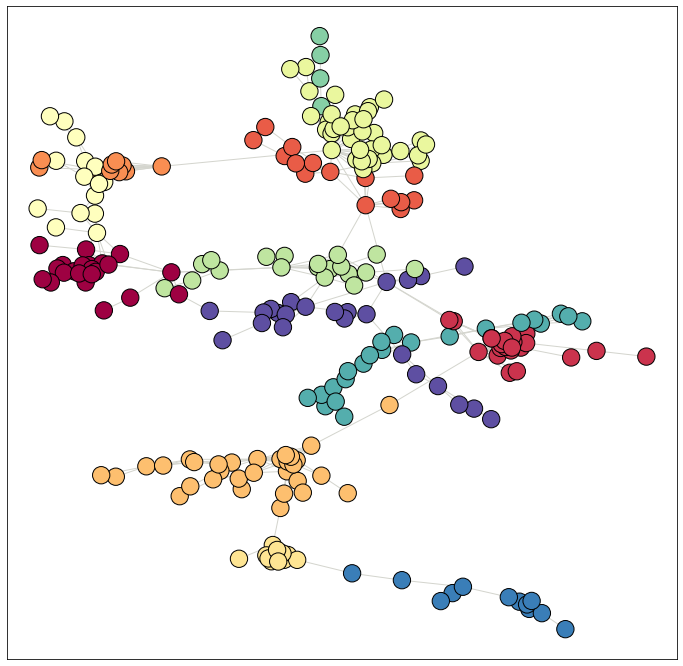

In [7]:
partition_ci = community.best_partition(giant_ci) 
modularity_ci = community.modularity(partition_ci, giant_ci) 
print('Modularity:', modularity_ci)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(giant_ci,seed=20532,scale=3)
colors_ci = [partition_ci[n] for n in giant_ci.nodes()] 

nx.draw_networkx_edges(giant_ci,pos,edge_color = "#D4D5CE")
nx.draw_networkx_nodes(giant_ci,pos,node_color=colors_ci, 
                       margins =0,
                       edgecolors='k',
                       cmap=plt.cm.Spectral
#                        ,node_size = [v['count'] for k,v in giant_ci.nodes.data()] #根据需要显示节点大小
                      )

# nx.draw_networkx_labels(giant_ci,pos)  也可以根究节点count的数值进行标签大小的显示
plt.savefig('figures/co-investigator-community.png',dpi=300,bbox='tight')

In [8]:
partition_ci

{'Gong, Guang': 0,
 'Bergeron, FranÃ\x81ois': 0,
 'Mitlin, David': 2,
 'Guay, Daniel': 7,
 'Songmene, Victor': 3,
 'Carreau, Pierre': 4,
 'Ajji, Abdellah': 4,
 'James, Brian': 5,
 'Mohanty, Amar Kumar': 5,
 'Morandotti, Roberto': 6,
 'Yue, Stephen': 7,
 'Chaouki, Jamal': 5,
 'Lacroix, Suzanne': 0,
 'Stinson, Douglas': 0,
 'Ruda, Harry': 0,
 'Davis, Boyd': 7,
 'Sivoththaman, Siva': 8,
 'Aitchison, Stewart': 8,
 'Liu, Zhaoheng': 9,
 'Walker, Gilbert': 8,
 'Gauvin, Raynald': 7,
 'Nguan, Christopher': 10,
 'Drouin, Dominique': 12,
 'Guo, Hong': 12,
 'Gray, Derek': 1,
 'Kitai, Adrian': 2,
 'Kerekes, Richard': 1,
 'Corbin, Stephen': 7,
 'Michelson, David': 11,
 'Militzer, Matthias': 7,
 'Athienitis, Andreas': 8,
 'Mojahedi, Mohammad': 8,
 'Mosca, Michele': 0,
 'Hubert, Pascal': 4,
 'Fernlund, Goran': 4,
 'Ko, Frank': 5,
 'Menezes, Alfred': 0,
 'Fichtinger, Gabor': 10,
 'Nojeh, Alireza': 11,
 'Waldman, Stephen': 10,
 'Panneton, Raymond': 4,
 'Berry, Alain': 4,
 'Kleiman, Rafael': 8,
 'Sinclai

In [9]:
df = pd.DataFrame([partition_ci],index=['type']).T
df

,type
"Gong, Guang",0
"Bergeron, FranÃois",0
"Mitlin, David",2
"Guay, Daniel",7
"Songmene, Victor",3
...,...
"Bao, Xiaoyi",6
"Hawrylak, Pawel",6
"Vaziri, Reza",4
"Preston, John",8


In [10]:
len(df['type'].unique())

13

In [11]:
df_type = df.reset_index().groupby('type')['index'].count()
df_type

type
0     23
1     23
2     15
3     12
4     31
5     13
6     15
7     37
8     19
9      4
10    22
11    12
12    24
Name: index, dtype: int64

In [12]:
filter_index_ls = df_type[df_type<5].index.tolist()
filter_index_ls

[9]

In [13]:
len(df[~df['type'].isin(filter_index_ls)])

246

In [14]:
df = df[~df['type'].isin(filter_index_ls)]
df['type'].unique()

array([ 0,  2,  7,  3,  4,  5,  6,  8, 10, 12,  1, 11], dtype=int64)

In [15]:
sorted(df['type'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]

In [16]:
df['type'] = df['type'].replace(to_replace=sorted(df['type'].unique()),value=list(range(12)))
print(sorted(df['type'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [17]:
print(df[df['type']==0].index.to_list())

['Gong, Guang', 'Bergeron, FranÃ\x81ois', 'Lacroix, Suzanne', 'Stinson, Douglas', 'Ruda, Harry', 'Mosca, Michele', 'Menezes, Alfred', 'Tapp, Alain', 'Dawson, Francis', 'Steinberg, Aephraim', 'Godbout, Nicolas', 'Watrous, John', 'Laflamme, Raymond', 'Robbie, Kevin', 'Nayak, Ashwin', 'Lutkenhaus, Norbert', 'CrÃ\x88peau, Claude', 'Tittel, Wolfgang', 'Cleve, Richard', 'Sanders, Barry', 'Lian, Keryn', 'Brassard, Gilles', 'Hoyer, Peter']


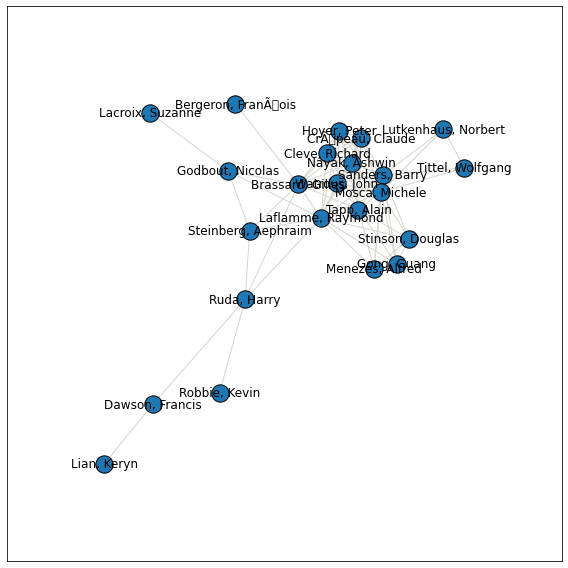

In [18]:
fig = plt.figure(figsize=(8,8))
type_0 = giant_ci.subgraph(df[df['type']==0].index.to_list())
pos = nx.spring_layout(type_0)
nx.draw_networkx_nodes(type_0,pos,edgecolors='k',
#                        node_size = [v['count']*5 for k,v in type_0.nodes.data()]
                      )
nx.draw_networkx_edges(type_0,pos,edge_color = "#D4D5CE")
nx.draw_networkx_labels(type_0,pos)

ax = plt.gca()
ax.margins(0.2)
fig.tight_layout()
plt.savefig('figures/co-investigator-part1.png',dpi=300,bbox='tight')

#### 所有分类网络数据集可视化，核心代码步骤归纳

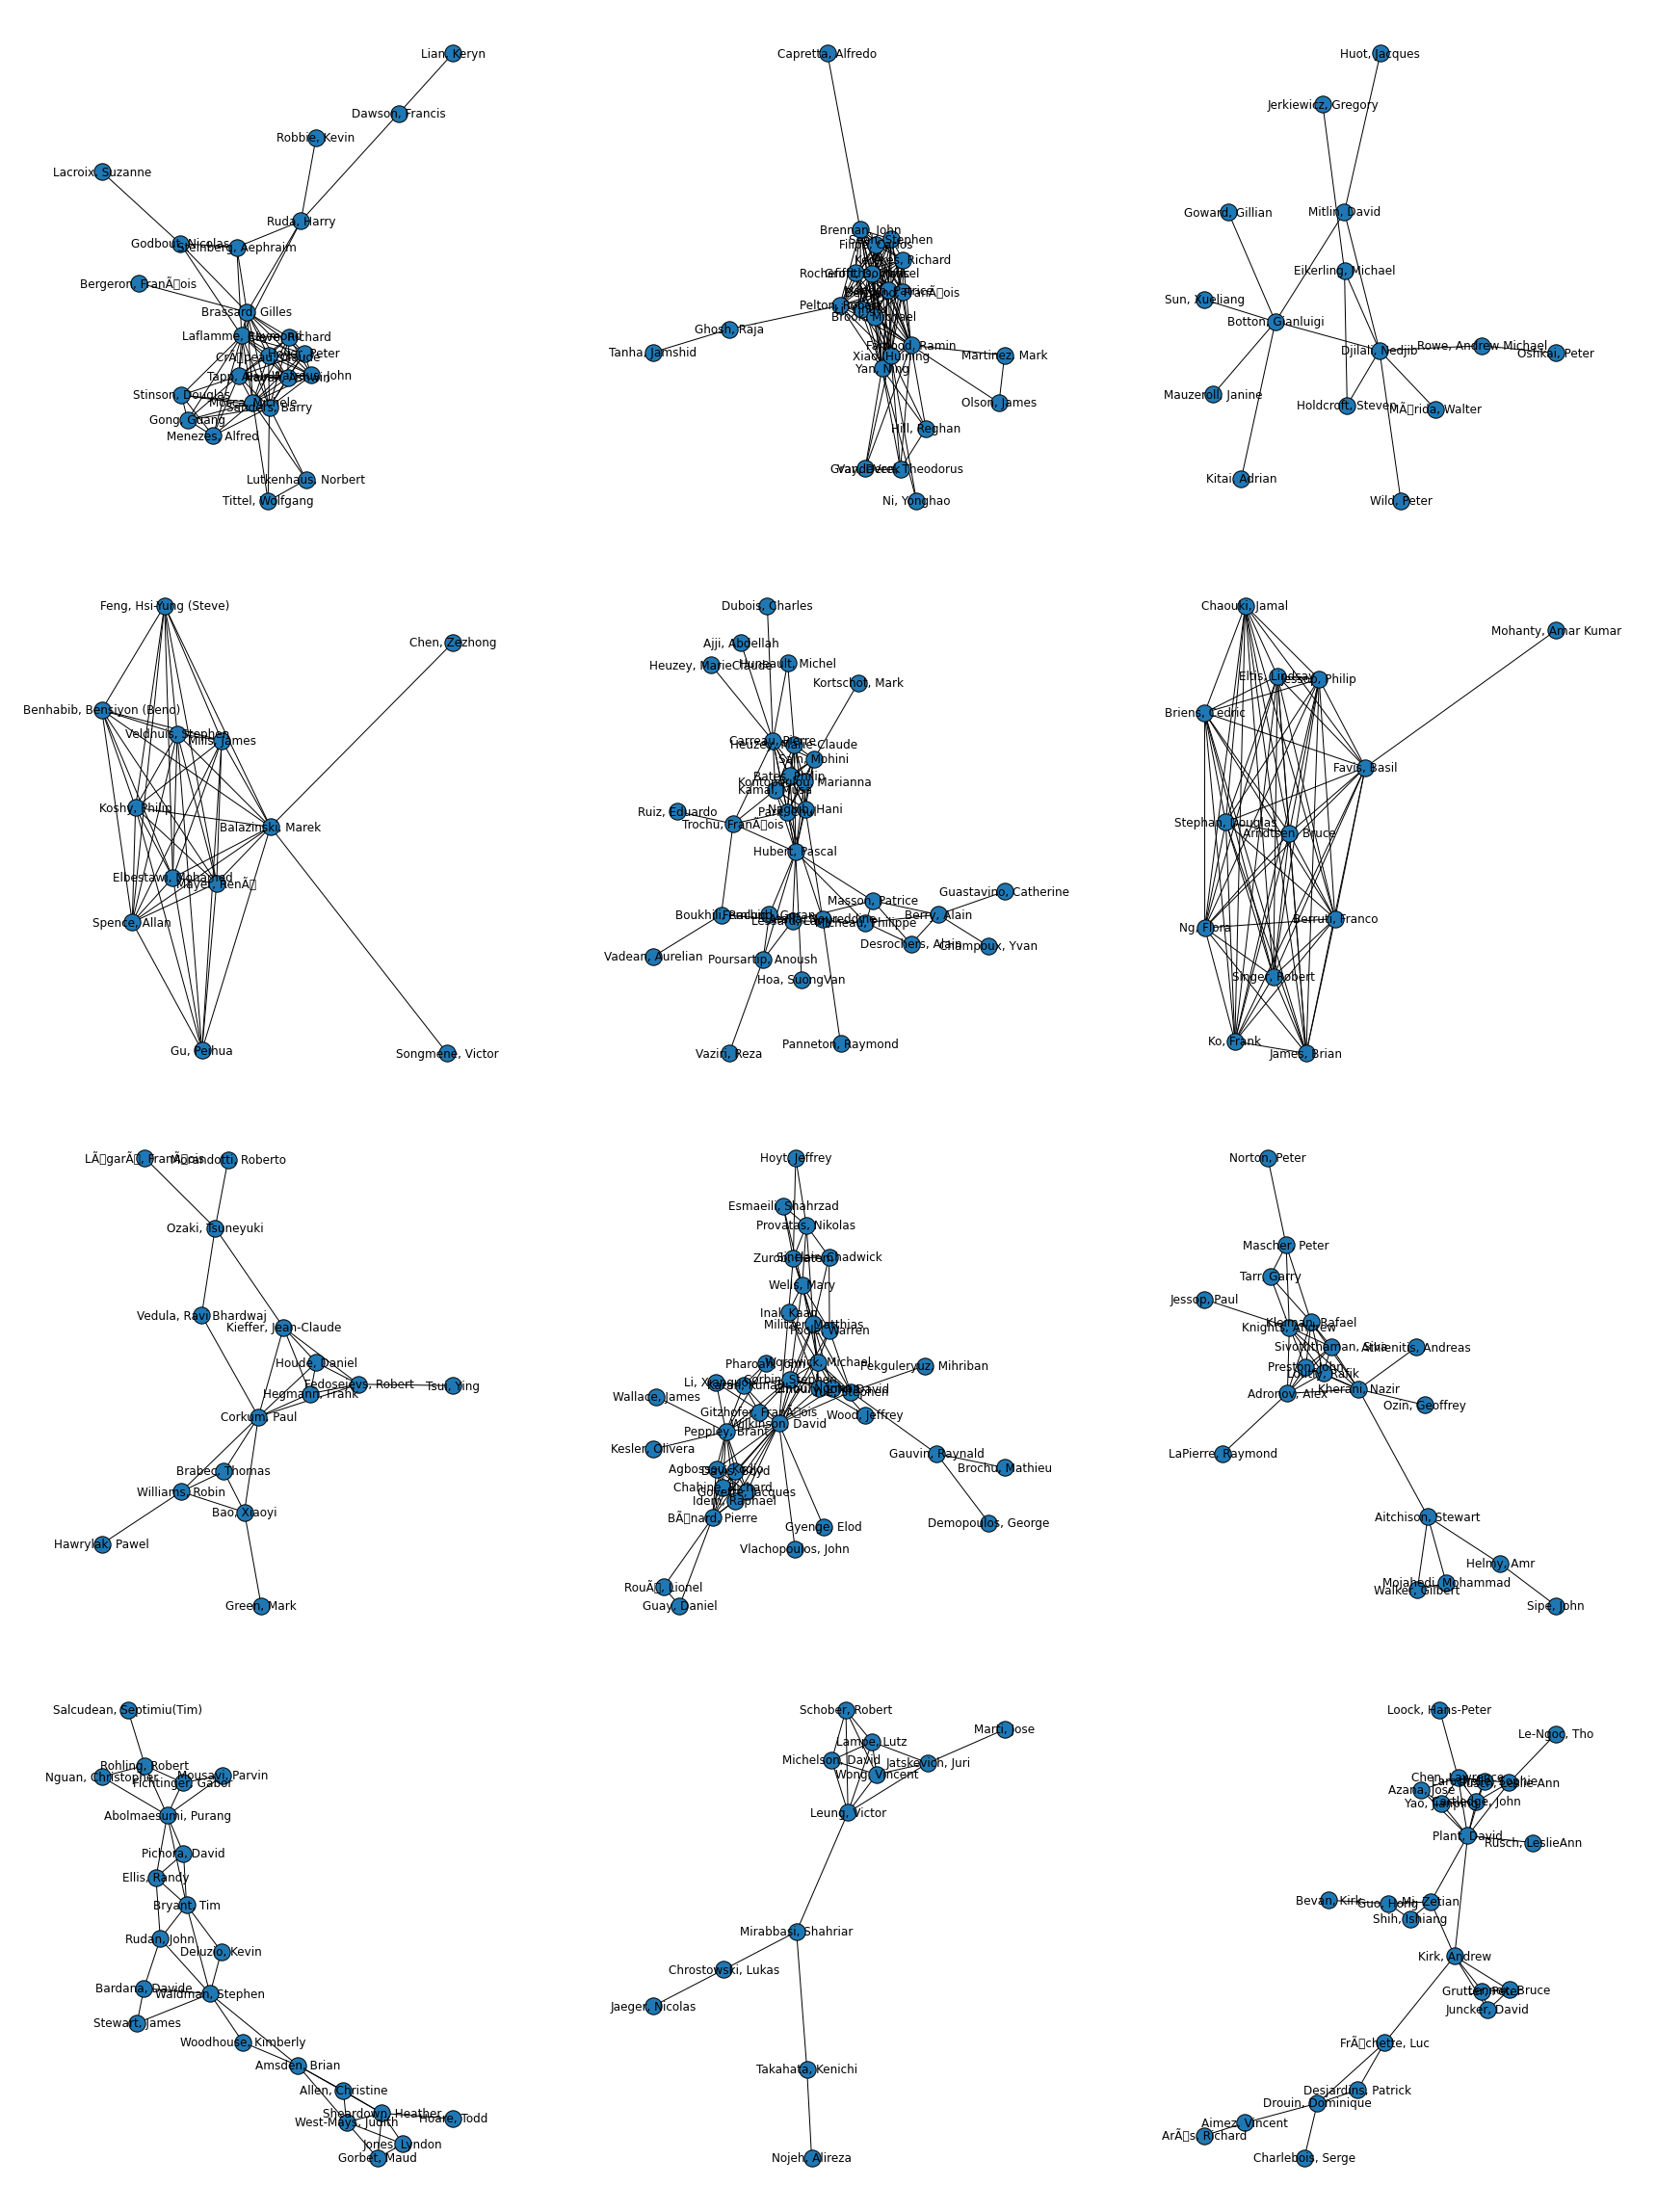

In [19]:
#设置画布大小
fig = plt.figure(figsize=(24,32))

#调整画布中的网络布局，设置为3行4列
axgrid = fig.add_gridspec(4,3)

#最大子群放置在前四行和所有列
ax0 = fig.add_subplot(axgrid[0:1,0:1])
type_0 = giant_ci.subgraph(df[df['type']==0].index.to_list())
nx.draw_spring(type_0,ax=ax0,with_labels=True,edgecolors='k')
ax0.set_xmargin(0.2)

ax1 = fig.add_subplot(axgrid[0:1,1:2])
type_1 = giant_ci.subgraph(df[df['type']==1].index.to_list())
nx.draw_spring(type_1,ax=ax1,with_labels=True,edgecolors='k')
ax1.set_xmargin(0.2)

ax2 = fig.add_subplot(axgrid[0:1,2:3])
type_2 = giant_ci.subgraph(df[df['type']==2].index.to_list())
nx.draw_spring(type_2,ax=ax2,with_labels=True,edgecolors='k')
ax2.set_xmargin(0.2)

ax3 = fig.add_subplot(axgrid[1:2,0:1])
type_3 = giant_ci.subgraph(df[df['type']==3].index.to_list())
nx.draw_spring(type_3,ax=ax3,with_labels=True,edgecolors='k')
ax3.set_xmargin(0.2)

ax4 = fig.add_subplot(axgrid[1:2,1:2])
type_4 = giant_ci.subgraph(df[df['type']==4].index.to_list())
nx.draw_spring(type_4,ax=ax4,with_labels=True,edgecolors='k')
ax4.set_xmargin(0.2)

ax5 = fig.add_subplot(axgrid[1:2,2:3])
type_5 = giant_ci.subgraph(df[df['type']==5].index.to_list())
nx.draw_spring(type_5,ax=ax5,with_labels=True,edgecolors='k')
ax5.set_xmargin(0.2)

ax6 = fig.add_subplot(axgrid[2:3,0:1])
type_6 = giant_ci.subgraph(df[df['type']==6].index.to_list())
nx.draw_spring(type_6,ax=ax6,with_labels=True,edgecolors='k')
ax6.set_xmargin(0.2)

ax7 = fig.add_subplot(axgrid[2:3,1:2])
type_7 = giant_ci.subgraph(df[df['type']==7].index.to_list())
nx.draw_spring(type_7,ax=ax7,with_labels=True,edgecolors='k')
ax7.set_xmargin(0.2)

ax8 = fig.add_subplot(axgrid[2:3,2:3])
type_8 = giant_ci.subgraph(df[df['type']==8].index.to_list())
nx.draw_spring(type_8,ax=ax8,with_labels=True,edgecolors='k')
ax8.set_xmargin(0.2)

ax9 = fig.add_subplot(axgrid[3:4,0:1])
type_9 = giant_ci.subgraph(df[df['type']==9].index.to_list())
nx.draw_spring(type_9,ax=ax9,with_labels=True,edgecolors='k')
ax9.set_xmargin(0.2)

ax10 = fig.add_subplot(axgrid[3:4,1:2])
type_10 = giant_ci.subgraph(df[df['type']==10].index.to_list())
nx.draw_spring(type_10,ax=ax10,with_labels=True,edgecolors='k')
ax10.set_xmargin(0.2)

ax11 = fig.add_subplot(axgrid[3:4,2:3])
type_11 = giant_ci.subgraph(df[df['type']==11].index.to_list())
nx.draw_spring(type_11,ax=ax11,with_labels=True,edgecolors='k')
ax11.set_xmargin(0.2)

fig.tight_layout()
plt.savefig('figures/co-investigator-parts.png',dpi=600,bbox='tight')

## 获取网络中心度相关指标

In [20]:
def degreeStats(Graph):
    import pandas as pd
    
    deg = nx.degree_centrality(Graph)
    eig = nx.eigenvector_centrality(Graph,max_iter=500)
    bet = nx.betweenness_centrality(Graph)
    clo = nx.closeness_centrality(Graph)
    
    df = pd.DataFrame([deg, eig, bet, clo],index=['degree', 'eigenvector', 'betweenness', 'closeness']).T

    return df

degreeStats(giant_ci)

,degree,eigenvector,betweenness,closeness
"Gong, Guang",0.024096,1.521623e-06,0.000000,0.125631
"Bergeron, FranÃois",0.004016,3.797272e-07,0.000000,0.125063
"Mitlin, David",0.020080,1.018589e-04,0.008032,0.174248
"Guay, Daniel",0.008032,3.422060e-06,0.000000,0.133584
"Songmene, Victor",0.004016,1.697333e-07,0.000000,0.118968
...,...,...,...,...
"Bao, Xiaoyi",0.016064,1.220961e-07,0.008032,0.113647
"Hawrylak, Pawel",0.004016,9.892768e-08,0.000000,0.112976
"Vaziri, Reza",0.004016,2.122236e-06,0.000000,0.111409
"Preston, John",0.032129,1.061033e-03,0.216511,0.198723


以betweenness中心度指标为例输出前50条数据并进行可视化

其它的单指标也可以依次绘制，多指标之间的关联也可以按照之前的方式进行绘制

In [21]:
bet_df = degreeStats(giant_ci).sort_values('betweenness',ascending=False)[:50]
bet_df

,degree,eigenvector,betweenness,closeness
"Mi, Zetian",0.036145,1.084959e-02,0.555067,0.210304
"Farnood, Ramin",0.076305,2.779762e-01,0.423123,0.193473
"Botton, Gianluigi",0.044177,9.644716e-04,0.403399,0.200322
"Kortschot, Mark",0.008032,2.109322e-02,0.345576,0.174737
"Sain, Mohini",0.036145,1.770804e-03,0.341042,0.159105
"Kherani, Nazir",0.040161,2.380754e-04,0.293202,0.179137
"Wilkinson, David",0.096386,1.419835e-04,0.283616,0.180043
"Ruda, Harry",0.028112,2.074191e-05,0.256005,0.160026
"VandeVen, Theodorus",0.020080,6.860835e-02,0.238875,0.201946
"Hill, Reghan",0.020080,6.860835e-02,0.238875,0.201946


In [22]:
trace = go.Bar(
    x = bet_df.index,
    y = bet_df['betweenness']
)

data = [trace]

layout = go.Layout(
    yaxis=dict(
        title='Betweenness Centrality',
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='betweenness_nserc')

## 研究者合作机构网络

In [23]:
inst = nserc_grants.networkCoInvestigatorInstitution() 
print(mk.graphStats(inst))

Nodes: 5489
Edges: 32552
Isolates: 823
Self loops: 165
Density: 0.00216123
Transitivity: 0.17326


In [24]:
print(sorted([len(c) for c in nx.connected_components(inst)],reverse=True))
#所有的网络信息，基本全在最大子群中

[4616, 16, 7, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
mk.dropEdges(inst, minWeight = 8,dropSelfLoops=True)
giant_ci = max((inst.subgraph(c) for c in nx.connected_components(inst)), key=len)
print(mk.graphStats(giant_ci))

Nodes: 925
Edges: 3749
Isolates: 0
Self loops: 0
Density: 0.00877267
Transitivity: 0.194296


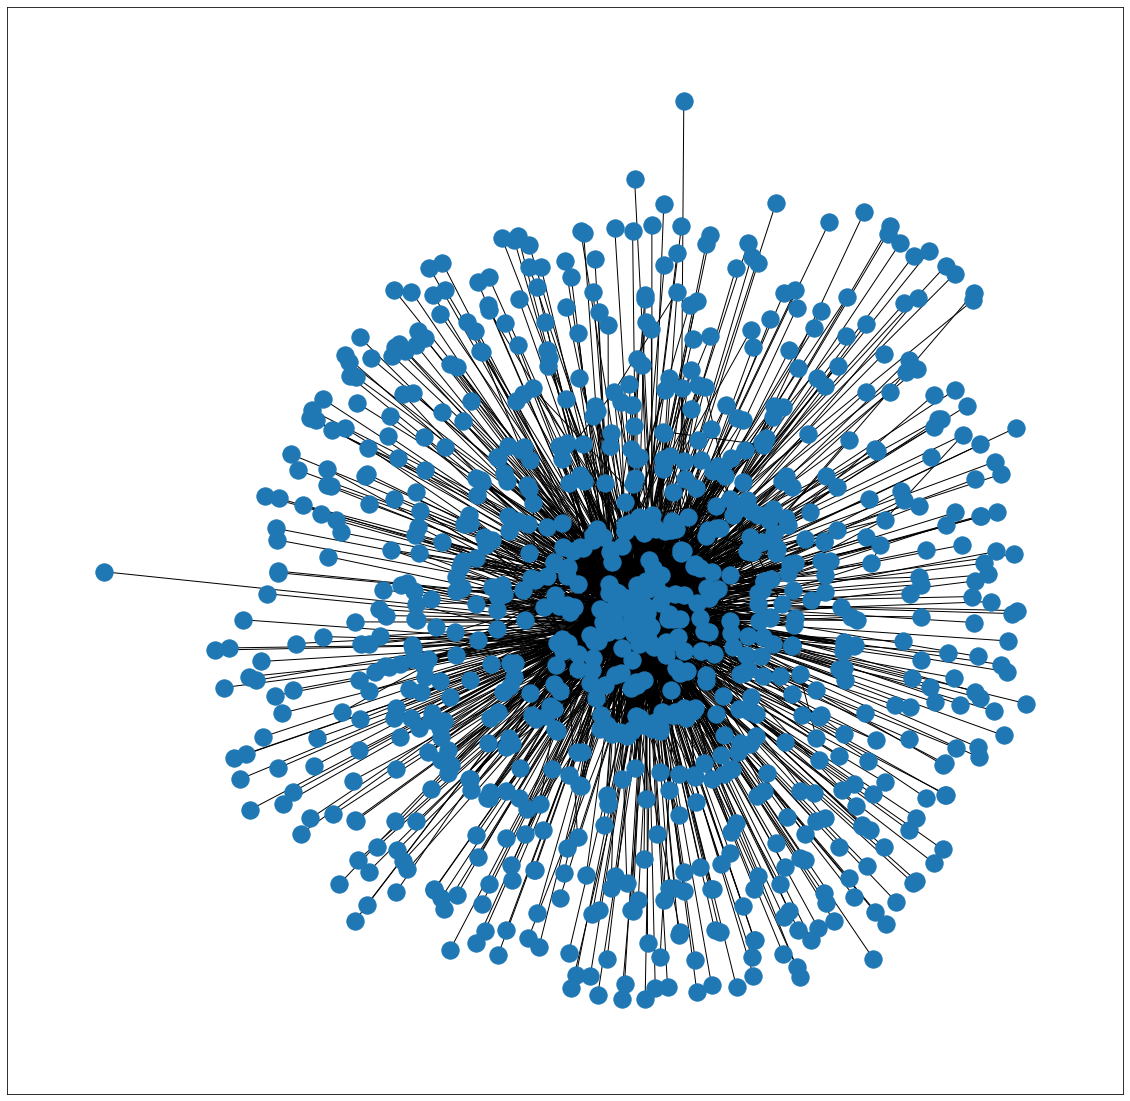

In [26]:
plt.figure(figsize=(20,20)) 

pos = nx.spring_layout(giant_ci)
nx.draw_networkx_nodes(giant_ci,pos,
#                        node_size=[v['count'] for k,v in giant_ci.nodes.data()]
                      )
# nx.draw_networkx_labels(giant_ci,pos)
nx.draw_networkx_edges(giant_ci,pos)
plt.show()

## 这种以某个节点为中心的网络，可考虑在中心点一定范围区域进行节点获取

现在要做的是提取这个最大节点度数量的作者周围的一定数量的节点和连线，而不是全部的节点和连线的子群，因此需要了解一下衡量网络的其他属性

|Method|Description|
|:--:|:--:|
|nx.shortest_path(G,a,b)|图G中a,b两个节点的最短路径包含的节点|
|list(nx.shortest_simple_paths(G,a,b))|图G中a,b两个节点之间所有路径的集合|
|len(nx.shortest_path(G,a,b))-1|图G中a,b节点之间的距离，即两个节点的最短路径包含的连线数量|
|nx.eccentricity(G)|图G中节点的偏心距，节点v的偏心距是v到G中所有其他节点的最大距离|
|nx.radius(G)|图G中的半径，半径是最小偏心距|
|nx.diameter(G)|图G的直径，直径是最大偏心距|
|nx.center(G)|图G的中心，中心是偏心距等于半径的节点集合|
|nx.periphery(G)|图G的外围，外围是一组偏心等于直径的节点|

shortest_path: [1, 3, 4, 5, 6, 7, 8, 9]
shortest_simple_paths: [[1, 3, 4, 5, 6, 7, 8, 9], [1, 0, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 0, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 0, 3, 4, 5, 6, 7, 8, 9]]
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
radius: 4
diameter: 7
center: [5, 6]
periphery: [0, 1, 2, 9]


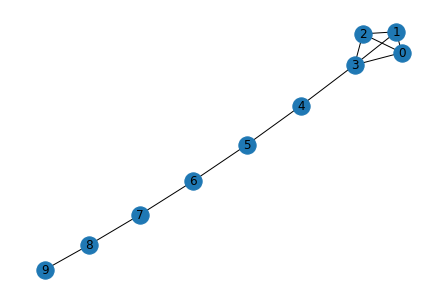

In [27]:
G = nx.lollipop_graph(4, 6)

print(f"shortest_path: {nx.shortest_path(G,1,9)}")
print(f"shortest_simple_paths: {list(nx.shortest_simple_paths(G,1,9))}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")


pos = nx.spring_layout(G, seed=3068) 
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [28]:
top_degree_nodes_ls = sorted(giant_ci.degree(),key=lambda x :x[1],reverse=True)
top_degree_nodes_ls

[('University of British Columbia', 318),
 ('University of Toronto', 242),
 ('McGill University', 219),
 ('University of Waterloo', 197),
 ('University of Alberta', 195),
 ('University of Calgary', 190),
 ('UniversitÃ\x88 Laval', 161),
 ('â\x80¦cole Polytechnique de MontrÃ\x88al', 151),
 ('University of Guelph', 135),
 ('McMaster University', 132),
 ('University of Ottawa', 127),
 ('Carleton University', 125),
 ("Queen's University", 120),
 ('University of Western Ontario', 115),
 ('University of New Brunswick', 113),
 ('University of Victoria', 108),
 ('University of Saskatchewan', 100),
 ('UniversitÃ\x88 de Sherbrooke', 99),
 ('UniversitÃ\x88 de MontrÃ\x88al', 90),
 ('Simon Fraser University', 89),
 ('Memorial University of Newfoundland', 88),
 ('UniversitÃ\x88 du QuÃ\x88bec â\x80¡ Rimouski', 86),
 ('University of Manitoba', 86),
 ('Concordia University', 85),
 ('Dalhousie University', 82),
 ('UniversitÃ\x88 du QuÃ\x88bec â\x80¡ Trois-RiviÃ\x8bres', 77),
 ('Institut national de la re

按照网络节点度进行排序输出，最大的网络节点为：University of British Columbia

In [29]:
hub_ego = nx.ego_graph(giant_ci,top_degree_nodes_ls[0][0],radius=1)
print(mk.graphStats(hub_ego))

Nodes: 319
Edges: 2572
Isolates: 0
Self loops: 0
Density: 0.0507088
Transitivity: 0.310344


总共319个节点，'University of British Columbia'节点的度就有318，说明网络图中所有的连线都是与该节点相连

In [30]:
hub_ego.degree(top_degree_nodes_ls[0][0])

318

节点和连线还是太多，可以进一步按照节点度进行数据集精简

In [31]:
mk.dropNodesByDegree(hub_ego,minDegree=100)
print(mk.graphStats(hub_ego))

Nodes: 126
Edges: 1941
Isolates: 0
Self loops: 0
Density: 0.246476
Transitivity: 0.523619


生成节点列表，剔除中心节点，方便进行单独设置节点属性

In [32]:
top_degree_nodes_ls = sorted(hub_ego.degree(),key=lambda x :x[1],reverse=True)
top_degree_nodes_ls

[('University of British Columbia', 125),
 ('McGill University', 110),
 ('University of Toronto', 102),
 ('UniversitÃ\x88 Laval', 92),
 ('University of Alberta', 88),
 ('University of Calgary', 83),
 ('University of Waterloo', 83),
 ('University of Ottawa', 82),
 ('University of New Brunswick', 80),
 ('University of Western Ontario', 79),
 ('â\x80¦cole Polytechnique de MontrÃ\x88al', 79),
 ("Queen's University", 75),
 ('University of Guelph', 74),
 ('Carleton University', 73),
 ('McMaster University', 72),
 ('University of Victoria', 71),
 ('Dalhousie University', 71),
 ('UniversitÃ\x88 de Sherbrooke', 68),
 ('UniversitÃ\x88 de MontrÃ\x88al', 66),
 ('Memorial University of Newfoundland', 63),
 ('Simon Fraser University', 63),
 ('University of Manitoba', 62),
 ('Institut national de la recherche scientifique', 55),
 ('UniversitÃ\x88 du QuÃ\x88bec â\x80¡ Trois-RiviÃ\x8bres', 53),
 ('Natural Resources Canada', 53),
 ('Concordia University', 53),
 ('University of Saskatchewan', 51),
 ('Uni

In [33]:
top_1_node_ls = [i[0] for i in top_degree_nodes_ls if i[-1]==125]
degree_nodes_up_80_ls = [i[0] for i in top_degree_nodes_ls if 125>i[-1]>=80]
other_nodes_ls = [i[0] for i in top_degree_nodes_ls if i[-1]<80]
print(top_1_node_ls)
print(degree_nodes_up_80_ls)

['University of British Columbia']
['McGill University', 'University of Toronto', 'UniversitÃ\x88 Laval', 'University of Alberta', 'University of Calgary', 'University of Waterloo', 'University of Ottawa', 'University of New Brunswick']


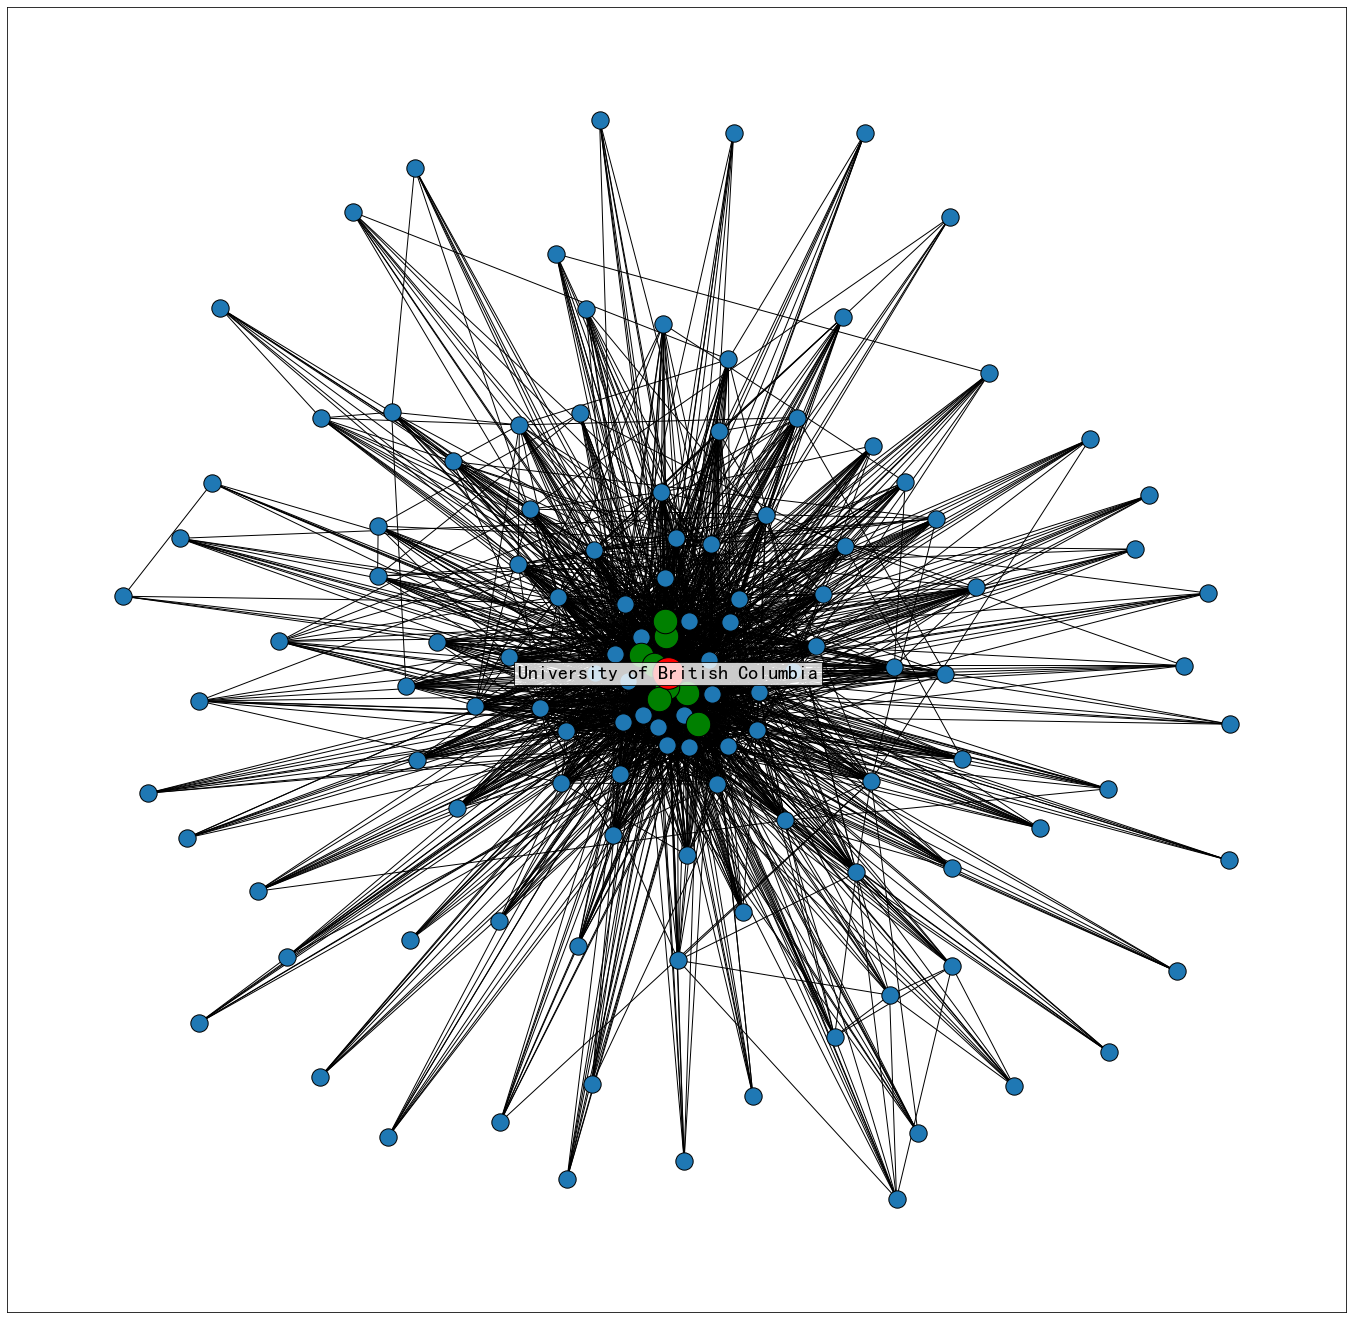

In [34]:
plt.figure(figsize=(24,24))
pos = nx.spring_layout(hub_ego,seed=98,iterations=200,k=0.8)

nx.draw_networkx_edges(hub_ego,pos)

nx.draw_networkx_nodes(hub_ego,pos,nodelist=other_nodes_ls,edgecolors='k')
nx.draw_networkx_nodes(hub_ego,pos,nodelist=degree_nodes_up_80_ls,edgecolors='k',node_size=600,node_color='green')
nx.draw_networkx_nodes(hub_ego,pos,nodelist=top_1_node_ls,edgecolors='k',node_size=1000,node_color='red')

top_labels_node = hub_ego.subgraph(top_1_node_ls)
label_options = {"ec": "k", "fc": "white", "alpha": 0.8}
nx.draw_networkx_labels(top_labels_node,pos,font_size=20, font_family='Simhei',font_weight="bold",bbox=label_options)

plt.savefig('figures/co-investigator-institution.png',dpi=300,bbox='tight')

In [35]:
degreeStats(hub_ego).sort_values('degree',ascending=False)

,degree,eigenvector,betweenness,closeness
University of British Columbia,1.000,0.189700,0.155739,1.000000
McGill University,0.880,0.181412,0.081567,0.892857
University of Toronto,0.816,0.177083,0.061563,0.844595
UniversitÃ Laval,0.736,0.170420,0.043705,0.791139
University of Alberta,0.704,0.168748,0.032848,0.771605
...,...,...,...,...
Transport Canada,0.056,0.023417,0.000000,0.514403
Forintek Canada Corp.,0.048,0.018493,0.000000,0.512295
British Columbia Institute of Technology,0.048,0.021521,0.000000,0.512295
Novelis Inc.,0.048,0.021140,0.000000,0.512295
